In [2]:
# %pip install matplotlib
# %pip install pandas
# %pip install numpy
# %pip install scikit-learn
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# df=pd.read_csv("weight-height.csv")
df = pd.read_csv(r"C:\Users\asus\Jupyter Notebook\SOCR-HeightWeight.csv")

In [4]:
del df['Index']

In [5]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [6]:
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [7]:
df.shape

(25000, 2)

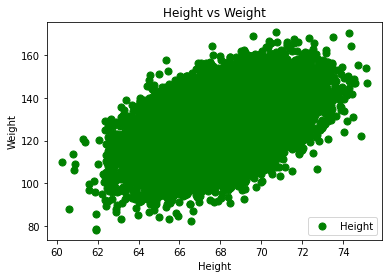

In [8]:
x2 = df.iloc[:, 0].values
y2 = df.iloc[:, 1].values
plt.scatter(x2,y2,label='Height',color='Green',s=50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend(loc="lower right")
plt.show()

In [9]:
X = df.iloc[:, 0:1].values
print(X)

[[65.78331]
 [71.51521]
 [69.39874]
 ...
 [64.69855]
 [67.52918]
 [68.87761]]


In [12]:
Y = df.iloc[:, 1].values
print(Y)

[112.9925 136.4873 153.0269 ... 118.2655 132.2682 124.8742]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

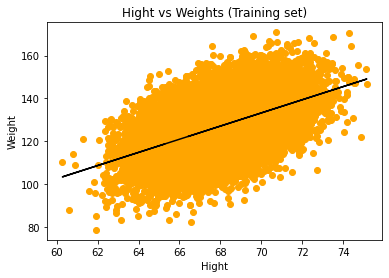

In [15]:
plt.scatter(X_train, y_train, color = 'Orange')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()

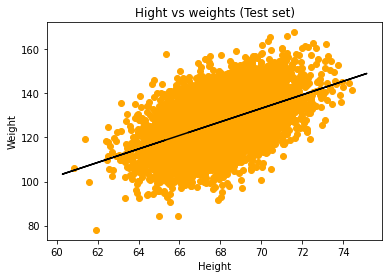

In [16]:
plt.scatter(X_test, y_test, color = 'Orange')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Hight vs weights (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [17]:
import numpy as np

y_pred = regressor.predict(X_test)
print('Coefficients: ', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))

rmse = np.sqrt(np.mean((regressor.predict(X_test) - y_test) ** 2))
print("Root mean squared error: %.2f" % rmse)

mae = np.mean(np.abs(regressor.predict(X_test) - y_test))
print("Mean absolute error: %.2f" % mae)

r2 = regressor.score(X_test, y_test)
print("R-squared score: %.2f" % r2)

n_features = X_test.shape[1]
n_samples = X_test.shape[0]
adjusted_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)
print("Adjusted R-squared score: %.2f" % adjusted_r2)

Coefficients:  [3.07421187]
Mean squared error: 102.21
Root mean squared error: 10.11
Mean absolute error: 8.03
R-squared score: 0.25
Adjusted R-squared score: 0.25


In [18]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('Coefficients: ', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Coefficients:  [3.07421187]
Mean squared error: 102.21
Variance score: 0.25
